##  HOG(Histogram of Oriented Gradient)
- 주로 **사람 인식(Human Detection)**과 보행자 검출을 하기 위해 널리 사용되는 기법 중 하나로 이미지의 지역적 형태(윤곽선, 경계)를 잡아내는 특성(Feature) 추출 알고리즘
- 그래디언트 방향 히스토그램을 의미하며 사람이 서 있는 영상에서 그래디언트를 구하고, 그래디언트의 크기와 방향 성분을 이용하여 사람이 서 있는 형태에 대한 특징 벡터를 정의 => 모양(shape) 정보에 강함, 배경 노이즈에 강인  
- 이미지를 일정한 셀로 나누고, 각 셀에서 그래디언트 방향의 히스토그램을 계산  
- 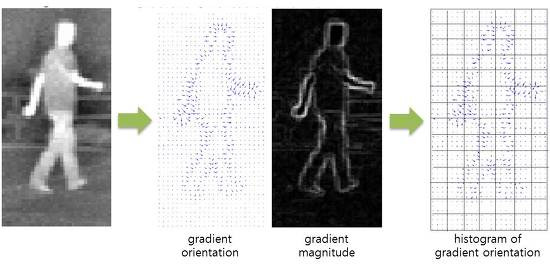   
    - 1)대상 영역을 일정 크기의 셀로 분할
    - 2)각 셀마다 edge 픽셀(gradient magnitude가 일정 값 이상인 픽셀)들의 방향에 대한 히스토그램을 구한 후 
    - 3)이들 히스토그램 bin 값들을 일렬로 연결한 벡터  

- 템플릿 매칭과 히스토그램 매칭의 중간 단계에 있는 매칭 방법으로 볼 수 있으며 블록 단위로는 기하학적 정보를 유지하되, 각 블록 내부에서는 히스토그램을 사용함으로써 로컬한 변화에는 어느정도 강인한 특성을 가짐
    - 1) 입력영상에서 부분영상 추출
    - 2) 크기 정규화 : 64X128
    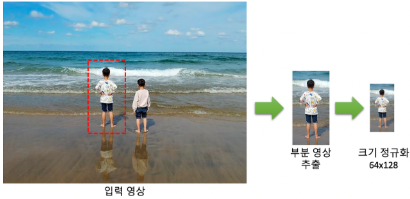
    - 3) 64X128영상의 gradient 계산하여 방향과 크기 성분 파악
    - 4) 8*8 크기의 셀분할
    - 5) 방향 시스토그램의 bin 개수 = 9 => 360도를 9개 구간으로 나옴
        > 8*8 셀 4개를 하나의 블록을 지정 ( 블록 하나의 크기는 16X16  => 각 블록의 히스토그램 빈 개수는 4X9=36개)
    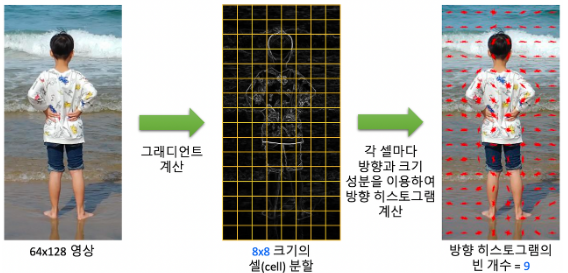

- `hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    - orientations=9 : 방향(bin) 개수 (360도를 9등분) 
    - pixels_per_cell=(8, 8) : 한 셀(cell) 크기
    - cells_per_block=(2, 2) : 블록(block) 내 셀 개수 (정규화 단위)
    - visualize=True :	HOG 시각화 결과도 리턴
    - block_norm='L2-Hys' :블록 정규화 방법 (L2-Hysteresis) => 블록(block) 안의 HOG 히스토그램 벡터를
"너무 작거나 너무 큰 값을 정리(normalize)해서 비교가 잘 되게" 하는 과정

- `cv2.HOGDescriptor.detectMultiScale(img, hitThreshold=None, winStride=None, padding=None, scale=None, finalThreshold=None, useMeanshiftGrouping=None) -> foundLocations, foundWeights`          
    - img: 입력 영상. cv2.CV_8UC1 또는 cv2.CV_8UC3.
    - hitThreshold: 특징 벡터와 SVM 분류 평면까지의 거리에 대한 임계값
    - winStride: 셀 윈도우 이동 크기. (0, 0) 지정 시 셀 크기와 같게 설정.
    - padding: 패딩 크기
    - scale: 검색 윈도우 크기 확대 비율. 기본값은 1.05.
    - finalThreshold: 검출 결정을 위한 임계값
    - useMeanshiftGrouping: 겹쳐진 검색 윈도우를 합치는 방법 지정 플래그
    - foundLocations: (출력) 검출된 사각형 영역 정보
    - foundWeights: (출력) 검출된 사각형 영역에 대한 신뢰도

HOG feature vector shape: (601020,)


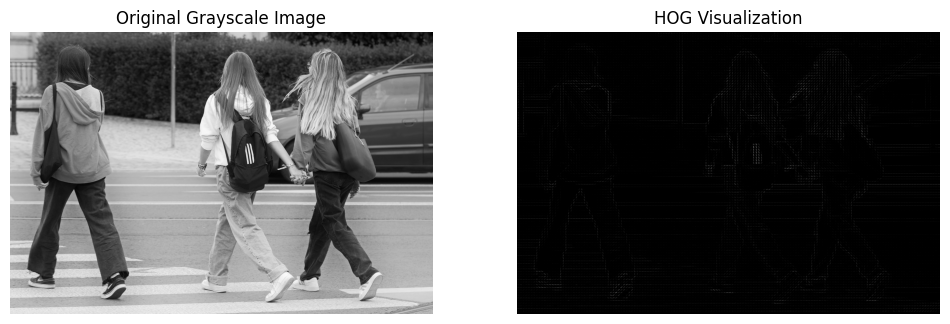

In [3]:
from skimage.feature import hog
from skimage import color
import matplotlib.pyplot as plt
import cv2

# 이미지 로드
img = cv2.imread('../cv_images/person.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HOG 특징 추출 및 시각화
features, hog_image = hog(gray,
                          orientations=9,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True,
                          block_norm='L2-Hys')

print('HOG feature vector shape:', features.shape)

# 결과 출력
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('HOG Visualization')
plt.imshow(hog_image, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
import cv2
import random
import sys
# 동영상 불러오기
cap = cv2.VideoCapture('../cv_images/video.mp4')

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()
    
# 보행자 검출을 위한 HOG 기술자 설정
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
        
    # 매 프레임마다 보행자 검출
    detected, _ = hog.detectMultiScale(frame) # 사각형 정보를 받아옴
    
    # 검출 결과 화면 표시
    for (x, y, w, h) in detected:
        c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.rectangle(frame, (x, y, w, h), c, 3)
        
    cv2.imshow('frame', frame)
    if cv2.waitKey(10) == 27:
        break

cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

HOG feature vector shape: (601020,)


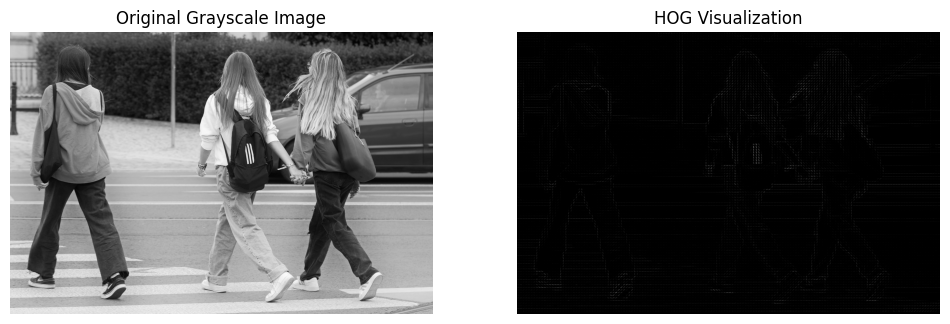

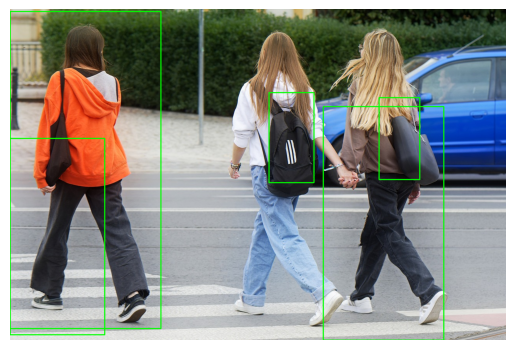

In [2]:
# 필요한 라이브러리 불러오기
from skimage.feature import hog        # HOG 특징 추출 함수
from skimage import color              # 색상 관련 함수 (이번 코드에서는 사용 안 함)
import matplotlib.pyplot as plt        # 시각화를 위한 라이브러리
import cv2                             # 이미지 로딩 및 전처리를 위한 OpenCV

# 이미지 로드
img = cv2.imread('../cv_images/person.jpg')   # 파일 경로에서 컬러 이미지 읽기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # 이미지를 그레이스케일로 변환 (HOG는 주로 흑백 이미지 사용)

# HOG 특징 추출 및 시각화
features, hog_image = hog(
    gray,                               # 입력 이미지 (그레이스케일)
    orientations=9,                     # 방향(bin)의 수 (0~180도 범위를 9개로 나눔)
    pixels_per_cell=(8, 8),              # 하나의 셀(cell) 크기 (픽셀 단위)
    cells_per_block=(2, 2),              # 하나의 블록(block)이 포함하는 셀의 수 (2x2 셀)
    visualize=True,                     # True로 설정하면 HOG 시각화용 이미지도 반환
    block_norm='L2-Hys'                  # 블록 정규화 방법 (L2-Hys 사용: 일반적으로 많이 사용됨)
)

# HOG 특징 벡터 크기 출력
print('HOG feature vector shape:', features.shape)   # 전체 이미지에서 추출된 특징 벡터의 shape 출력

# 결과 시각화
plt.figure(figsize=(12,6))             

plt.subplot(1,2,1)                     
plt.title('Original Grayscale Image')   
plt.imshow(gray, cmap='gray')           
plt.axis('off')                         

plt.subplot(1,2,2)                     
plt.title('HOG Visualization')          
plt.imshow(hog_image, cmap='gray')       
plt.axis('off')                        

plt.show()             

# 1)HOGDescriptor 객체 생성 
hog = cv2.HOGDescriptor()

# 2)보행자 검출을 위한 학습된 분류기 불러오기
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 3)HOG 멀티스케일 객체 검출
(rects, weights) = hog.detectMultiScale(gray, winStride=(4, 4), padding=(8, 8), scale=1.05)

# 검출 결과 그리기
for (x, y, w, h) in rects:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()